# Exploratory Data Analysis on Video Game Sales from 1980-2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [13]:
#Load in CSV file into dataframe
df = pd.read_csv('C:/Users/tommy/data/vgsales.csv')
#Get a look at first 5 rows to see what we are dealing with
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [14]:
#Find out how many rows/columns exist in the data as well as the data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
#Before moving forward, check for null values
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [29]:
# Drop null values in order to not obstruct data analysis process, reset index in order to avoid confusion about missing rows
df.dropna(inplace=True)
df = df.reset_index(drop=True)

In [30]:
#Check again to make sure null values have been removed
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [28]:
#Convert Year from float to integer. This allows us to potentially use datetime functions as well as avoid confusion
df['Year']=df['Year'].astype('Int64')
df['Year']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16286    2002
16287    2003
16288    2008
16289    2010
16290    2003
Name: Year, Length: 16291, dtype: Int64

In [35]:
#Search for duplicates
df.loc[df.duplicated(subset=['Name'])]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
35,36,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
37,38,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,5.54,5.82,0.49,1.62,13.46
40,41,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
44,45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
...,...,...,...,...,...,...,...,...,...,...,...
16279,16589,Secret Files 2: Puritas Cordis,DS,2009,Adventure,Deep Silver,0.00,0.01,0.00,0.00,0.01
16284,16594,Myst IV: Revelation,PC,2004,Adventure,Ubisoft,0.01,0.00,0.00,0.00,0.01
16287,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16288,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [38]:
#After seeing two instances of GTA V on differing platforms, query another name in duplicate list
df.query('Name == "Spirits & Spells"')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15396,15678,Spirits & Spells,GC,2003,Platform,Wanadoo,0.01,0.0,0.0,0.0,0.02
16290,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.0,0.0,0.0,0.01


It is safe to assume these duplicates are in fact games released on different platforms, and removing them is not necessary

In [56]:
total_sales = df['Global_Sales'].sum()
global_sales_perc = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum() / total_sales * 100
global_sales_perc = global_sales_perc.round(1)
print(global_sales_perc)

NA_Sales       49.1
EU_Sales       27.3
JP_Sales       14.6
Other_Sales     9.0
dtype: float64


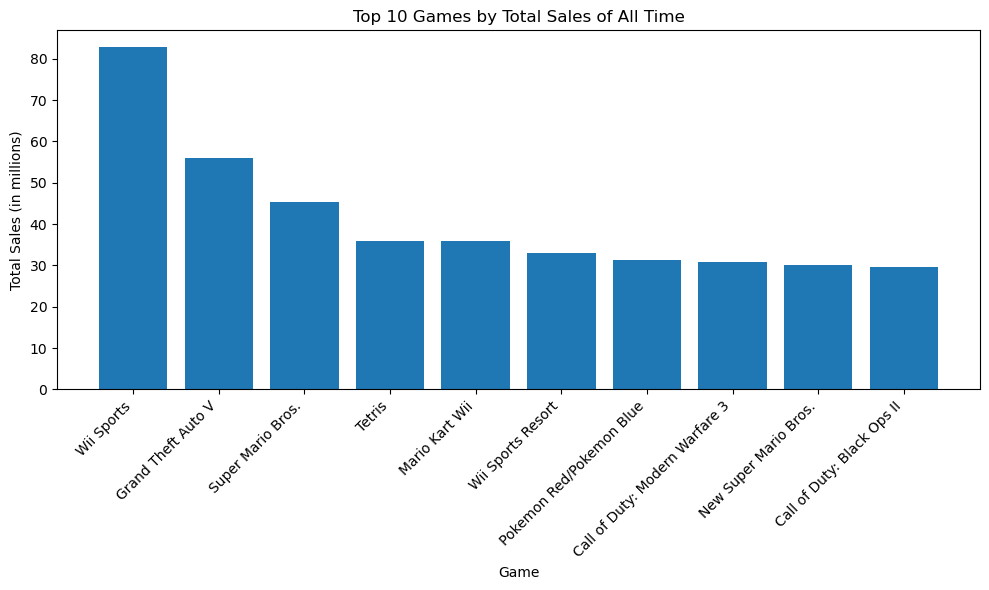

In [68]:
#Find the top ten games by global sales **caveat** need to group by name as we discovered earlier some games are sold across multiple platforms
consolidated_sales = df.groupby('Name')['Global_Sales'].sum().reset_index()
top_10_games = consolidated_sales.sort_values(by='Global_Sales', ascending=False).head(10)

# Plotting the top ten games
plt.figure(figsize=(10, 6))
plt.bar(top_10_games['Name'], top_10_games['Global_Sales'])
plt.xlabel('Game')
plt.ylabel('Total Sales (in millions)')
plt.title('Top 10 Games by Total Sales of All Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

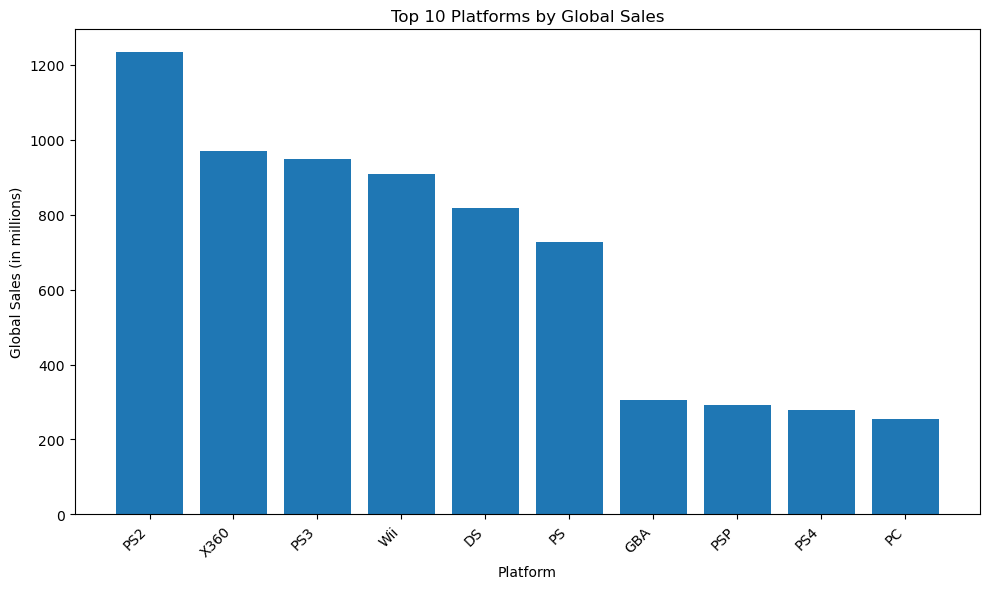

In [67]:
#Find the platforms with the most Global Sales
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()
top_10_platforms = platform_sales.sort_values(by='Global_Sales', ascending=False).head(10)


plt.figure(figsize=(10, 6))
plt.bar(top_10_platforms['Platform'], top_10_platforms['Global_Sales'])
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.title('Top 10 Platforms by Global Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()